In [ ]:
#from transformers import datasets
import torch
from torchvision import transforms
from torch.utils.data import DataLoader

In [ ]:
from fastai.vision.all import *
import pandas as pd

In [ ]:
from datasets import load_dataset
#dataset = load_dataset('Maysee/tiny-imagenet') 
dataset = load_dataset('imagenet-1k', cache_dir='data/imagenet') 

Found cached dataset imagenet-1k (/home/sathiesh/lib_dev/figures_phd_thesis/nbs/data/imagenet/imagenet-1k/default/1.0.0/a1e9bfc56c3a7350165007d1176b15e9128fcaf9ab972147840529aed3ae52bc)


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
import json
  
# Opening JSON file
f = open('dataset_info.json')
  
# returns JSON object as 
# a dictionary
data = json.load(f)

In [ ]:
label_list = data['features']['label']['names']
labels_dict = {i: label_list[i] for i in range(len(label_list))}

In [ ]:
labels_dict[3]

'tiger shark, Galeocerdo cuvieri'

In [ ]:
label_list[3]

'tiger shark, Galeocerdo cuvieri'

In [ ]:
data = dataset['validation']

In [ ]:
data

Dataset({
    features: ['image', 'label'],
    num_rows: 50000
})

In [ ]:
df = data.to_pandas()

In [ ]:
#df.head()

In [ ]:
# iterate over the 'age' column and add 1 to each value
for index, value in df['image'].iteritems():
    df.at[index, 'image'] = value['bytes']

In [ ]:
df['label'] = df['label'].map(labels_dict)

In [ ]:
df.head()

,image,label
0,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xed\x1d\x9aPhotoshop 3.0\x008BIM\x04\x04\x00\x00\x00\x00\x00\x07\x1c\x02\x00\x00\x02\x00\x00\x008BIM\x04%\x00\x00\x00\x00\x00\x10\xe8\xf1\\\xf3/\xc1\x18\xa1\xa2{g\xad\xc5d\xd5\xba8BIM\x04/\x00\x00\x00\x00\x00J(\x08\x01\x00H\x00\x00\x00H\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xd0\x02\x00\x00@\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x18\x03\x00\x00d\x02\x00\x00\x00\x01\xc0\x03\x00\x00\xb0\x04\x00\x00\x01\x00\x0f\'\x01\x005\x002\x000\x00.\x00C\x00R\x002\x008BIM\x03\xed\x00\x00\x00\x00\x00\x10\x00`\x00\x00\x00\x01\x0...,coucal
1,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xdb\x00C\x00\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x02\x02\x03\x02\x02\x02\x02\x02\x04\x03\x03\x02\x03\x05\x04\x05\x05\x05\x04\x04\x04\x05\x06\x07\x06\x05\x05\x07\x06\x04\x04\x06\t\x06\x07\x08\x08\x08\x08\x08\x05\x06\t\n\t\x08\n\x07\x08\x08\x08\xff\xdb\x00C\x01\x01\x01\x01\x02\x02\x02\x04\x02\x02\x04\x08\x05\x04\x05\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08...,Italian greyhound
2,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xdb\x00C\x00\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x02\x02\x03\x02\x02\x02\x02\x02\x04\x03\x03\x02\x03\x05\x04\x05\x05\x05\x04\x04\x04\x05\x06\x07\x06\x05\x05\x07\x06\x04\x04\x06\t\x06\x07\x08\x08\x08\x08\x08\x05\x06\t\n\t\x08\n\x07\x08\x08\x08\xff\xdb\x00C\x01\x01\x01\x01\x02\x02\x02\x04\x02\x02\x04\x08\x05\x04\x05\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08...,volcano
3,"b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x01,\x01,\x00\x00\xff\xdb\x00C\x00\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x02\x02\x03\x02\x02\x02\x02\x02\x04\x03\x03\x02\x03\x05\x04\x05\x05\x05\x04\x04\x04\x05\x06\x07\x06\x05\x05\x07\x06\x04\x04\x06\t\x06\x07\x08\x08\x08\x08\x08\x05\x06\t\n\t\x08\n\x07\x08\x08\x08\xff\xdb\x00C\x01\x01\x01\x01\x02\x02\x02\x04\x02\x02\x04\x08\x05\x04\x05\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08...",Welsh springer spaniel
4,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xe2\x0cXICC_PROFILE\x00\x01\x01\x00\x00\x0cHLino\x02\x10\x00\x00mntrRGB XYZ \x07\xce\x00\x02\x00\t\x00\x06\x001\x00\x00acspMSFT\x00\x00\x00\x00IEC sRGB\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-HP \x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x11cprt\x00\x00\x01P\x00\x00\x003desc\x00\x00\x01\x84\x00\x00\x00lwtpt\x00\x00\x01\xf0\x00...,chickadee


In [ ]:
# from PIL import Image
# import io
# image_data = df.image[10]
# image = Image.open(io.BytesIO(image_data))
# image.shape#image.show()

(377, 500)

In [ ]:
imagenet = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   splitter=RandomSplitter(),#ColSplitter('is_valid'),
                   get_x=ColReader('image'),
                   get_y=ColReader('label',label_delim=','),
                   item_tfms = Resize(500, 500),
                   batch_tfms=aug_transforms(size=224))

In [ ]:
dls = imagenet.dataloaders(df)

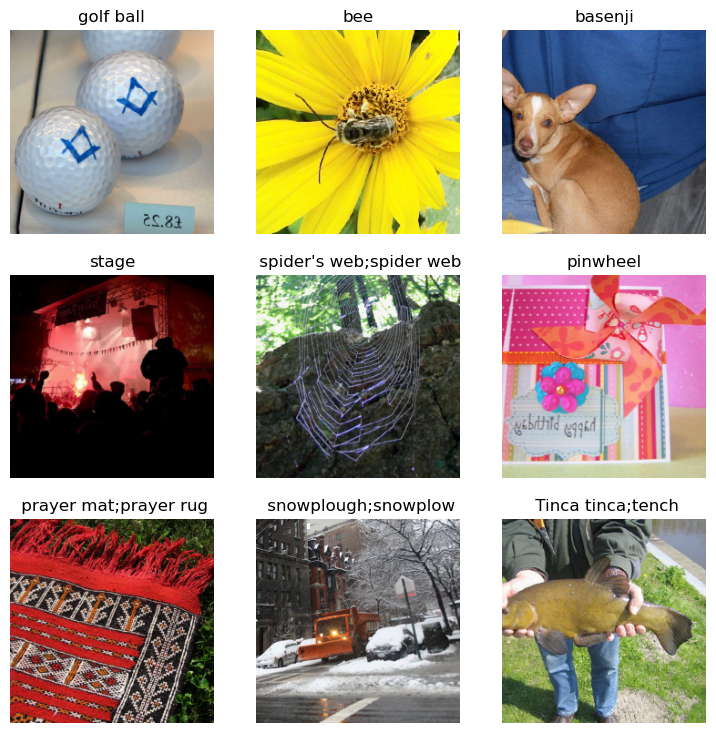

In [ ]:
dls.show_batch()

In [ ]:
learn = vision_learner(dls, resnet18)
learn.fit(1)
#learn.fine_tune(1)

epoch,train_loss,valid_loss,time
0,0.008799,0.007193,01:21


In [ ]:
import timm 

In [ ]:
#avail_pretrained_models = timm.list_models(pretrained=True)
#len(avail_pretrained_models), avail_pretrained_models

In [ ]:
model = timm.create_model('convnext_tiny_in22k', pretrained=True)

In [ ]:
learn = vision_learner(dls, 'convnext_tiny_in22k', metrics=error_rate)

In [ ]:
learn.fit(1)

epoch,train_loss,valid_loss,error_rate,time
